<a href="https://colab.research.google.com/github/dhana-2005/Dhana-Phase2/blob/main/Source_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving sentimentdataset.csv to sentimentdataset.csv
Initial dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB
None

Sample data:
   Unnam

<ipython-input-8-71411f4fb79c>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', order=['Positive', 'Neutral', 'Negative'], palette='Set2')


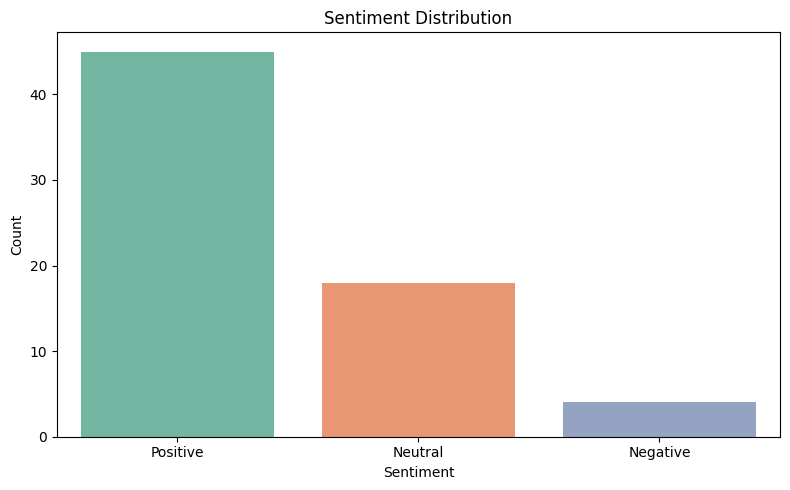

                    precision    recall  f1-score   support

        Acceptance       0.00      0.00      0.00         2
         Amazement       0.00      0.00      0.00         1
               Awe       0.00      0.00      0.00         1
          Betrayal       0.00      0.00      0.00         1
        Bitterness       0.00      0.00      0.00         1
          Calmness       0.00      0.00      0.00         1
       Captivation       0.00      0.00      0.00         1
         Challenge       0.00      0.00      0.00         1
             Charm       0.00      0.00      0.00         1
        Compassion       0.00      0.00      0.00         1
         Confusion       0.00      0.00      0.00         1
     Contemplation       0.00      0.00      0.00         1
       Contentment       0.00      0.00      0.00         1
Culinary Adventure       0.00      0.00      0.00         1
         Curiosity       0.00      0.00      0.00         2
           Despair       0.00      0.00

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


['sentiment_model']

In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import joblib
from google.colab import files

# Upload the dataset
uploaded = files.upload()

# Load the dataset
df = pd.read_csv("sentimentdataset.csv")
print("Initial dataset info:")
print(df.info())

print("\nSample data:")
print(df.head(3))

print("\nMissing values per column:")
print(df.isnull().sum())

# Data preprocessing
df = df.dropna()
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"\nRemoved {before - after} duplicate rows.")

# Exploratory Data Analysis
if 'text' in df.columns:
    print("\nText column exists in the dataset.")
    print(df['text'].head())

# Visualization
df.columns = df.columns.str.strip()
df['Sentiment'] = df['Sentiment'].str.strip()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sentiment', order=['Positive', 'Neutral', 'Negative'], palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Feature Engineering and Model Training
X = df['Text']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

model = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

# Save the model
joblib.dump(model, 'sentiment_model')